In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Github/Colab_Notebook

/content/drive/MyDrive/Colab Notebooks/Github/Colab_Notebook


In [ ]:
!git config --global user.email 'inseop.hwang@hotmail.com'
!git config --global user.name 'Hot-Kimchi'

In [ ]:
!git add .
!git status
!git add 8_3_사전\ 훈련된\ 모델\ 활용하기.ipynb

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   "8_3_\341\204\211\341\205\241\341\204\214\341\205\245\341\206\253 \341\204\222\341\205\256\341\206\253\341\204\205\341\205\247\341\206\253\341\204\203\341\205\254\341\206\253 \341\204\206\341\205\251\341\204\203\341\205\246\341\206\257 \341\204\222\341\205\252\341\206\257\341\204\213\341\205\255\341\206\274\341\204\222\341\205\241\341\204\200\341\205\265.ipynb"



In [ ]:
!git commit -m 'feature extraction without data argumentation'
!git push -u origin main

[main f5f37cb] feature extraction without data argumentation
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite "8_3_\341\204\211\341\205\241\341\204\214\341\205\245\341\206\253 \341\204\222\341\205\256\341\206\253\341\204\205\341\205\247\341\206\253\341\204\203\341\205\254\341\206\253 \341\204\206\341\205\251\341\204\203\341\205\246\341\206\257 \341\204\222\341\205\252\341\206\257\341\204\213\341\205\255\341\206\274\341\204\222\341\205\241\341\204\200\341\205\265.ipynb" (99%)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 778 bytes | 389.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/Hot-KimChi/Colab_Notebook.git
   a00297c..f5f37cb  main -> main
Branch 'main' set up to track remote branch 'main' from 'origin'.


>### 작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 매우 효과적인 방법
- 사전 훈련된 모델 사용(pretrained model): ex) 1400만개의 레이블된 이미지 데이터 & 대규모 컨브넷
  - 1) 특성 추출
  - 2) 미세 조정

>#### 1) 사전 훈련된 모델을 사용한 특성 추출

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [2]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

>### Data download

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:17<00:00, 49.6MB/s]


'dogs-vs-cats.zip'

In [5]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [6]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


>### 최종 특성 맵의 크기 (5, 5, 512)
- 이 지점에서 2가지 방식이 가능
  - 1) 새로운 데이터셋에서 합성곱 기반 층을 실행, 출력을 넘파이 배열로 디스크 저장(without 데이터증식)
    - 저장된 데이터를 독립된 밀집 연결 분류기에 입력으로 사용
    - 합성곱 연산은 전체 과정 중, 가장 비싼 부분
    - 모든 입력 이미지에 합성곱 기반 층을 한번만 실행, 비용이 적게 소요되나 데이터 증식 사용 불가능
  - 2) 준비된 모델 위에 Dense 층을 쌓아 확장(with 데이터 증식)
    - 입력 데이터에서 엔드-투-엔드로 전체 모델 실행
    - 모든 입력 이미지가 매번 합성곱 기반층을 통과되기에 데이터 증식 사용 가능
    - 이러한 방식때문에 비용이 휠씬 많이 발생.

>#### 1) 합성곱 기반 층을 실행 & 출력을 넘파이로 저장

In [8]:
## 데이터 증식을 사용하지 않는 빠른 특성추출
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []

  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 21ms/step


In [9]:
train_features.shape

(2000, 5, 5, 512)

>#### 규제를 위해 드롭아웃 사용한 밀집 연결 분류기 정의 및 훈련

In [10]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

callbacks = [keras.callbacks.ModelCheckpoint(
    filepath='feature_extraction.keras',
    save_best_only=True,
    monitor='val_loss')
]

history = model.fit(train_features, train_labels,
                    epochs=20, 
                    validation_data=(val_features, val_labels),
                    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 22.5605 - accuracy: 0.9140 - val_loss: 6.2860 - val_accuracy: 0.9570
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 2.9983 - accuracy: 0.9770 - val_loss: 3.9858 - val_accuracy: 0.9740
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 3.4097 - accuracy: 0.9805 - val_loss: 5.7450 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.7849 - accuracy: 0.9875 - val_loss: 4.8265 - val_accuracy: 0.9700
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7921 - accuracy: 0.9910 - val_loss: 6.3878 - val_accuracy: 0.9700
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6290 - accuracy: 0.9925 - val_loss: 4.9814 - val_accuracy: 0.9770
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1560 - accuracy: 0.9985 - val_loss: 5.3698 - val_accuracy: 0.9670
Epoch 8/20
63/63 [

>#### 결과를 그래프로 확인

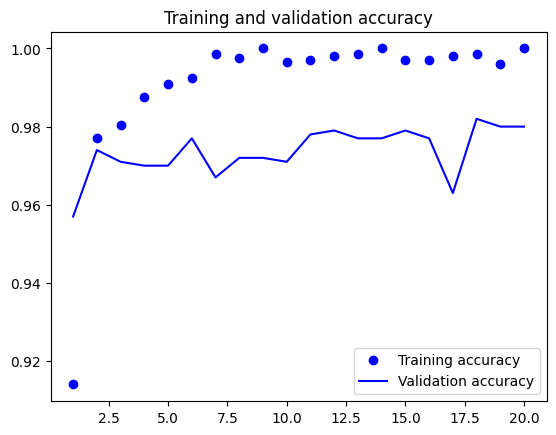

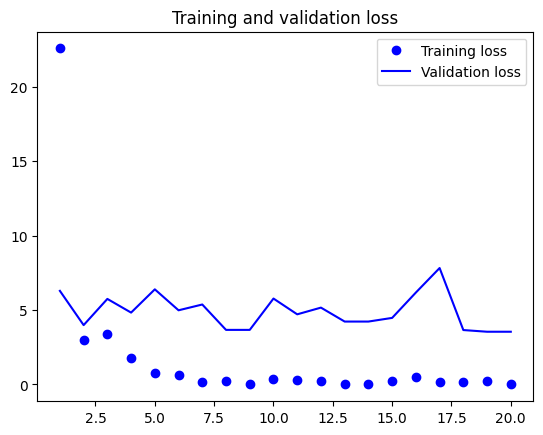

In [11]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

>### 많은 비율로 Dropout을 사용하였지만, 훈련 시작 시 바로 과대적합 발생
- 이를 위해 데이터 증식 기법이 필요

>#### 2) 데이터 증식을 사용한 특성 추출
  - 휠씬 느리고 비용이 많이 들지만 훈련하는 동안 데이터 증식 기법 사용 가능
  - 방법: conv_base + 새로운 밀집 분류기 연결 모델 생성 --> 입력 데이터 사용하여 엔드-투-엔드 실행
    - 합성곱 기반 층 동결(freezing): 훈련하는 동안 가중치가 업데이트되지 않도록 막는다 --> 합성곱 기반 층에 의해 사전에 학습된 표현이 훈련하는 동안 수정 혹은 훼손 발생

In [12]:
conv_base_frz = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False)

## False으로 인해 층이나 모델을 동결 / 즉, 훈련 가능한 가중치 리스트가 텅 비게된다.
conv_base_frz.trainable = False

In [13]:
## Freezing 전후 비교
conv_base_frz.trainable = True
print('합성곱 기반 층 동결 전의 훈련 가능한 가중치 개수:', 
      len(conv_base_frz.trainable_weights))

합성곱 기반 층 동결 전의 훈련 가능한 가중치 개수: 26


In [14]:
## Freezing 전후 비교
conv_base_frz.trainable = False
print('합성곱 기반 층 동결 전의 훈련 가능한 가중치 개수:', 
      len(conv_base_frz.trainable_weights))

합성곱 기반 층 동결 전의 훈련 가능한 가중치 개수: 0
